In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns',None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Load train data
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
## Load test data       
test = pd.read_csv("test.csv")

# Drop Id columns
test = test.drop(columns='Id', axis=1)

# EDA on Train Data
- Distribution of the Target Variable "SalePrice"
- Correlation matrix of all numerical features
- Correlation matrix of top 10
- Scatterplot for SalePrice vs GRLvArea to indentify the outliers (As per data desc - there are 4 outliers)


In [ ]:
## Shape of the Data
print(f"Shape of the Data is {train.shape}")

Shape of the Data is (1460, 81)


**Target variables distribution**

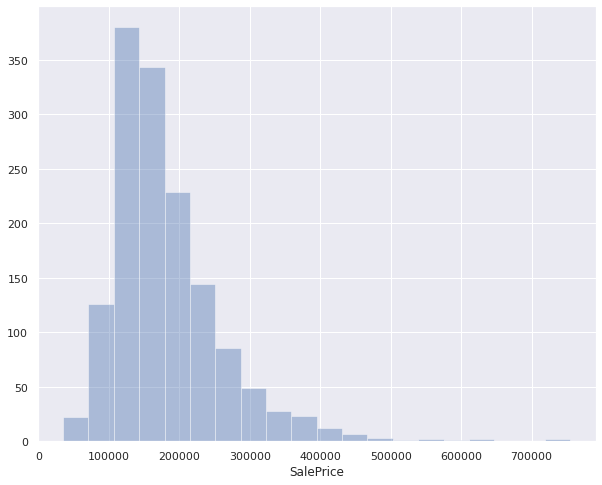

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(train['SalePrice'], kde=False, bins=20)
plt.show()

**Correlation of Numerical Features**

In [ ]:
correlation = train.select_dtypes(include=np.number).corr()
cor_salesprice = correlation['SalePrice']

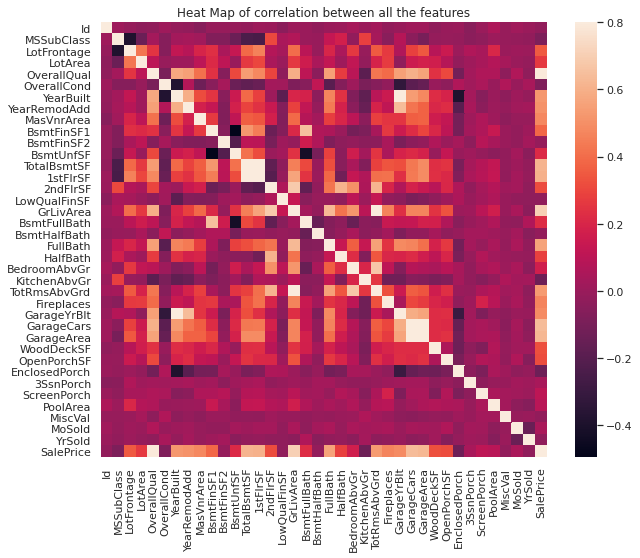

In [ ]:
## Heat Map of all features correlation
plt.title("Heat Map of correlation between all the features")
sns.heatmap(correlation, vmax=0.8)
plt.show()

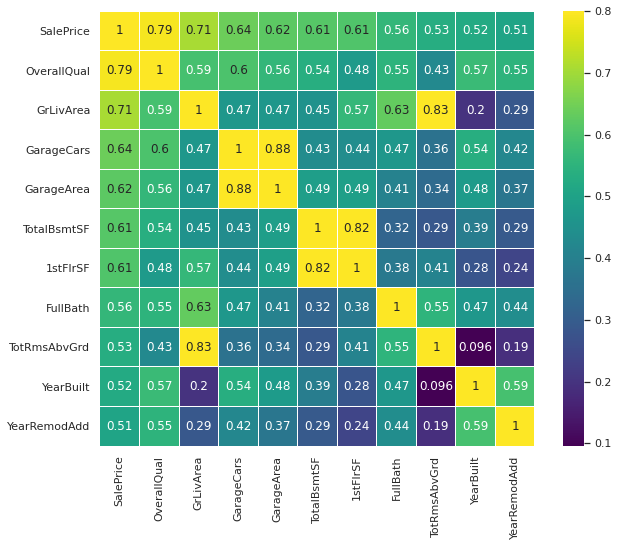

In [ ]:
## Heatmap of feature with High correlations
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].to_numpy().T)
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white", \
            xticklabels=cols.values, yticklabels=cols.values)

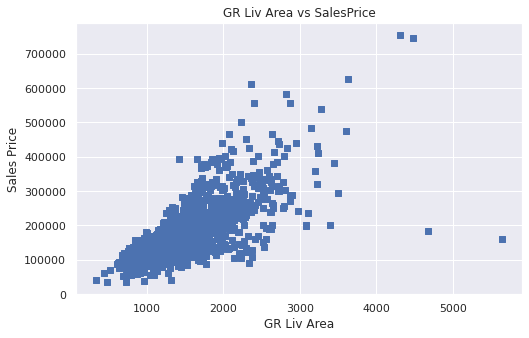

In [ ]:
# Outliers between SalesPrice and GRLIVArea (As it is indicated in  data description)
# Scatter Plot
fig = plt.figure(figsize=(8,5))
plt.scatter(train.GrLivArea,train.SalePrice, marker='s')
plt.title("GR Liv Area vs SalesPrice")
plt.xlabel("GR Liv Area")
plt.ylabel("Sales Price")
plt.show()
## There are two outlier which should be removed .. As per the recommendation in data description
# we should remove all data with GR Liv Area more than 4000
train = train[train.GrLivArea < 4000]
train.reset_index(inplace=True,drop=True)
y = train['SalePrice']

# Pre Processing
- Filter the train data to remove the outliers in SalesPrice vs GR Liv Area
- Merge the train and test dataset 

____________________________________________________

**--Feature Engineering on Numerical Features--**

1) Create Ploynomial (degree 3) features for the top 15 correlated features

2) To handle the skewness of the numerical features, appy log transformation to all the numerical features with skewness more than 0.1

3) Standardize all the numerical features 


**--Feature Engineering on Categorical Features--**

1) Grouping of few categories

2) Dummy Variable creation 

_______________________________________________________



In [ ]:
## Merge the train and Test dataset
 # Drop the SalePrice and merge train and Test
Xtrain = train.drop(columns=["SalePrice","Id"],axis=1)

In [ ]:
 ### Merge Xtrain and Test data for puporse of data pre-processing
data = pd.concat([Xtrain,test],axis=0)
data.reset_index(inplace=True,drop=True)

**Missing data in entire data set (train+test)**

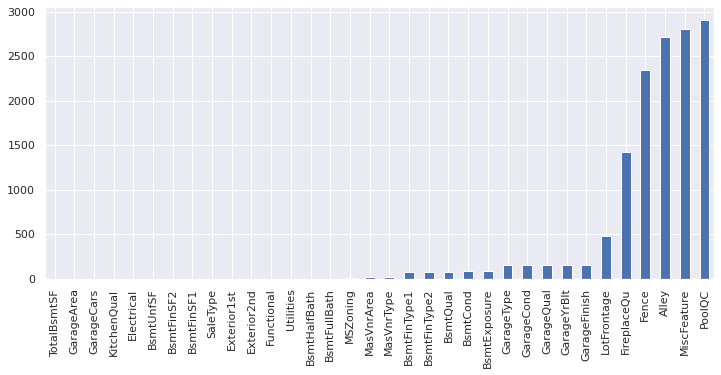

In [ ]:
## Columns with NUll values
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(12,5))
missing.plot.bar()

**Handle the Missing data** 

In [ ]:
##******************************************************************************************************##
fillmean = ['GarageArea','GarageCars','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2']
# Fill Train data and Test data
for col in fillmean:
    data.loc[:, col] = data.loc[:, col].fillna(np.mean(data.loc[:, col]))  

##******************************************************************************************************##
fillmode = ['Exterior1st','Exterior2nd','KitchenQual','SaleType','Utilities','Functional', \
                 'BsmtHalfBath','BsmtFullBath','MSZoning','Electrical']
# Fill train and test missing value with mode
for col in fillmode:
    data.loc[:, col] = data.loc[:, col].fillna(data.loc[:, col].mode()[0])
##******************************************************************************************************##
# For below columns 'NA' mean 'No'
fill_No = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual',\
           'GarageCond','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']
for col in fill_No:
    data.loc[:, col] = data.loc[:, col].fillna('No')
##******************************************************************************************************##
# For below numerical columns 'NA' can be filled with 0
fill_zero = ['LotFrontage','MasVnrArea']
for col in fill_zero:
    data.loc[:, col] = data.loc[:, col].fillna(0)
##******************************************************************************************************##
# GarageYrBlt - fill GarageYrBlt with YearBlt value assuming those two would be same in most cases
data.loc[:, "GarageYrBlt"] = np.where(data.loc[:, "GarageYrBlt"].isnull(),data.loc[:, "YearBuilt"] \
                                       , data.loc[:, "GarageYrBlt"])



**Feature Engineering**

In [ ]:
# MSSubClass - Categorical (Identifies the type of dwelling involved in the sale.)
data['MSSubClass'] = data['MSSubClass'].astype('object')


In [ ]:
data.isnull().values.any()

False

In [ ]:
### Grouping of below variables which has rating from 10-1
for c in ['OverallQual','OverallCond']:  
  rating = data[c]
  data["New"+c] = ''
  data.loc[:,"New"+c] = np.where((1<=rating) & (rating<=4),'Fair', data.loc[:,"New"+c])
  data.loc[:,"New"+c] = np.where((5<=rating) & (rating<=7),'Good', data.loc[:,"New"+c])
  data.loc[:,"New"+c] = np.where((8<=rating) & (rating<=10),'Excellent', data.loc[:,"New"+c])

In [ ]:
data.isnull().values.any()

False

**Fix Skewness of numerical features**

In [ ]:
# List of Numerical features
num_features_list2 = list(data.select_dtypes(exclude='object').columns)

In [ ]:
# Check the skew of all numerical features
from scipy.stats import norm, skew
skewed_feats = data[num_features_list2].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness the in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skewness the in numerical features: 



,Skew
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
KitchenAbvGr,4.298845
BsmtFinSF2,4.142753
EnclosedPorch,4.000796
ScreenPorch,3.943508
BsmtHalfBath,3.942892


In [ ]:
## Fix skewness for all features with skewness more than 0.75
skewness = skewness[abs(skewness) > 0.75]
print("{} skewed numerical features tranformed using Box Cox".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feature in skewed_features:
    data[feature] = boxcox1p(data[feature], lam)

35 skewed numerical features tranformed using Box Cox


**New Interaction Features using nuemrical Variables**

- Polynomial features of top 15 correlated features

In [ ]:
# Ploynomial features for top 10 columns correlated with SalesPrice (using train data)
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
top_10 = []
for (i,cor) in enumerate(list(corr.SalePrice.index)):
  if i >0:
    top_10.append(cor)
    if i > 10: break      
print(top_10)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
Id              -0.027455
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   

In [ ]:
## Create 2 degress polynomial features for top 10 correlated variables (only interaction)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=False)
poly_features = poly.fit_transform(data[top_10])
df=pd.DataFrame(poly_features,index=range(0,poly_features.shape[0]),columns=range(0,poly_features.shape[1]))

In [ ]:
## Merge the Polynomial features 
data1= pd.concat([data,df], axis=1)

In [ ]:
print(data1.isnull().values.any())

False


**Standardize the numerical features**

In [ ]:
## Standardize the numerical features
from sklearn.preprocessing import StandardScaler, RobustScaler
s = RobustScaler()
data1.loc[:, num_features_list2] = s.fit_transform(data1.loc[:, num_features_list2])

**Creating new categorical features**

In [ ]:

data['YrBltAndRemod']=data['YearBuilt']+data['YearRemodAdd']
data['TotalSF']=data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF'])

data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])

In [ ]:
## List of categorical variables
cat_features_list2 = list(data.select_dtypes(include='object').columns)

In [ ]:
dummy_data = pd.get_dummies(data1,columns=cat_features_list2,drop_first=True)

In [ ]:
## Seperate the Train and Test Data set
lasti = train.last_valid_index()
Xtrain = dummy_data.iloc[:lasti+1, :]
X_pred = dummy_data.iloc[lasti+1:, :]

In [ ]:
print(f"Shape of training data after data preprocessing :{Xtrain.shape}")

Shape of training data after data preprocessing :(1456, 354)


**Fix the skewness of the Target variable**

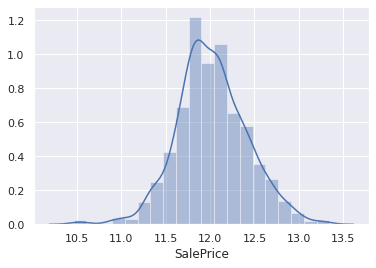

In [ ]:
## ****** Log Transformation of target SalePrice *******
#Taking log for SalePrice as the Salesprice is skewed..Also the rate of increase in salesprice 
# with GRLivArea increases aas GRLivarea increa
y = np.log(y)
## Check the distrbution graph
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(y, kde=True, bins=20)

# Model Training

- Ridge Regression 
- Lasso Regression 


In [ ]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv(model,Xtrain,y):
    rmse= np.sqrt(-cross_val_score(model, Xtrain, y, scoring = scorer, cv = 10))
    return(rmse)

**Ridge Model**

In [ ]:
from sklearn.linear_model import RidgeCV
ridge1 = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv=10)
ridge1.fit(Xtrain, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_cv(ridge1,Xtrain,y).mean())

Best alpha : 19.5
Ridge RMSE on Training set : 0.11199569351516007


In [ ]:
## Use the best alpha value from above to try more alpha values
print("Try again for more precision with alphas centered around " + str(alpha))
ridge2 = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge2.fit(Xtrain, y)
alpha = ridge2.alpha_
print("Final Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_cv(ridge2,Xtrain,y).mean())

Try again for more precision with alphas centered around 19.5
Final Best alpha : 19.5
Ridge RMSE on Training set : 0.1117573395423036


**Lasso Regression**

In [ ]:
from sklearn.linear_model import LassoCV
lasso1 = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso1.fit(Xtrain, y)
alpha = lasso.alpha_
print("Best alpha :", alpha)
print("Lasso RMSE on Training set :", rmse_cv(lasso1,Xtrain,y).mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.274021317159307, tolerance: 0.02054447671979002
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5762346789977872, tolerance: 0.0201748653350787
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08942724479905095, tolerance: 0.02003160279416816
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want t

Best alpha : 0.0006


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18460994131611486, tolerance: 0.01864399378609528
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03389829202238914, tolerance: 0.01847007610627022
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031607366373478385, tolerance: 0.01847007610627022
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might w

Lasso RMSE on Training set : 0.11071605569733314


In [ ]:
## Using the best alpha value from above to try more alpha values
print("More precision with alphas centered around " + str(alpha))
lasso2 = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], max_iter = 50000,
                cv = 10)
lasso2.fit(Xtrain, y)
alpha = lasso.alpha_
print("Final Best alpha :", alpha)
print("Lasso RMSE on Training set :", rmse_cv(lasso2,Xtrain,y).mean())

More precision with alphas centered around 0.0006


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021170039192886847, tolerance: 0.02003160279416816
  tol, rng, random, positive)


Final Best alpha : 0.0006


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03431533085269933, tolerance: 0.01806292785580971
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03343108425298702, tolerance: 0.018203739167259626
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022268540663013425, tolerance: 0.01838825006576999
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

KeyboardInterrupt: ignored

**Save the Models parameters and coeeficient values in Pickel file**

In [ ]:
# Save the trained model in pickel file
import pickle

# Save Ridge Model
pkl_filename = "model_ridge.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(ridge,file)

# Save Lasso Model
pkl_filename = "model_lasso.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(lasso,file)

# Evaluation & Prediction on Training set

**Ridge evaluation**

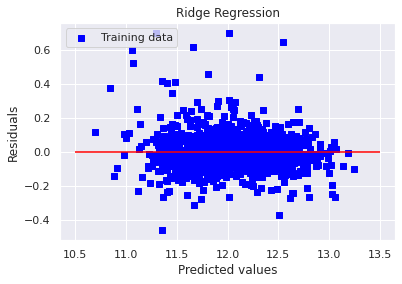

Ridge picked 352 features and eliminated the other 2 features


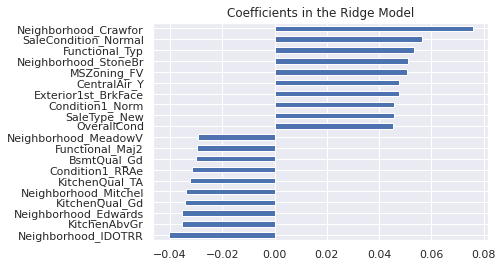

In [ ]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y, c = "blue", marker = "s", label = "Training data")
plt.title("Ridge Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = Xtrain.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

**Lasso Evaluation**

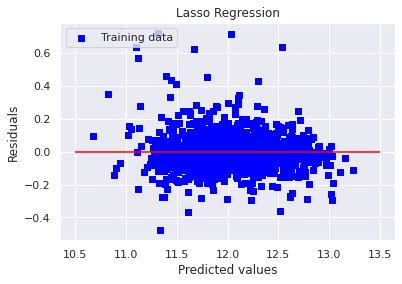

Lasso picked 103 features and eliminated the other 251 features


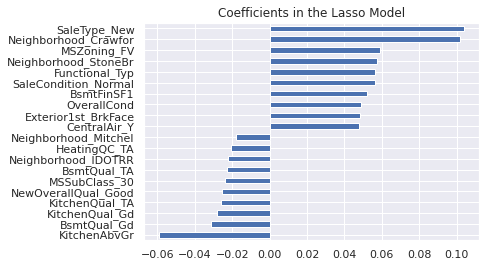

In [ ]:
# Plot residuals
plt.scatter(y_train_lasso, y_train_lasso - y, c = "blue", marker = "s", label = "Training data")
plt.title("Lasso Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = Xtrain.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# Final prediction on the Test data using both model 

In [ ]:
############# Prediction using Ridge
sale_ridge1 = np.exp(ridge1.predict(X_pred))
## Load submission file and update predictions using all models
sample_ridge1 = pd.read_csv("sample_submission.csv")
sample_ridge1['SalePrice'] = sale_ridge1
sample_ridge1.to_csv("submission_ridge1.csv", index=False)

In [ ]:
sale_ridge2 = np.exp(ridge2.predict(X_pred))
## Load submission file and update predictions using all models
sample_ridge2 = pd.read_csv("sample_submission.csv")
sample_ridge2['SalePrice'] = sale_ridge2
sample_ridge2.to_csv("submission_ridge2.csv", index=False)

In [ ]:
sale_lasso1 = np.exp(lasso1.predict(X_pred))
## Load submission file and update predictions using all models
sample_lasso1 = pd.read_csv("sample_submission.csv")
sample_lasso1['SalePrice'] = sale_lasso1
sample_lasso1.to_csv("submission_lasso1.csv", index=False)

In [ ]:
sale_lasso2 = np.exp(lasso2.predict(X_pred))
## Load submission file and update predictions using all models
sample_lasso2 = pd.read_csv("sample_submission.csv")
sample_lasso2['SalePrice'] = sale_lasso2
sample_lasso2.to_csv("submission_lasso2.csv", index=False)